In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [23]:
n = 25
alpha = 0.05
data = pd.read_csv("dim%s_linear_gaussian.csv"%(n,))
trues = data["true"][:1000]
pred_corr = data["corr"][:1000]
pred_rdc = data["rdc"][:1000]
for i in range(1000):
    if pred_corr[i] < alpha/2:
        pred_corr[i] = 1
    else:
        pred_corr[i] = 0
    if pred_rdc[i] < alpha/2:
        pred_rdc[i] = 1
    else:
        pred_rdc[i] = 0
print("Poder del test: ")
print("CORR: " + str(tpr(trues, pred_corr)))
print("RDC : " + str(tpr(trues, pred_rdc)))

print("Error de tipo I:")
print("CORR: " + str(fdr(trues, pred_corr)))
print("RDC : " + str(fdr(trues, pred_rdc)))

Poder del test: 
CORR: 1.0
RDC : 1.0
Error de tipo I:
CORR: 0.1506849315068493
RDC : 0.0998185117967332


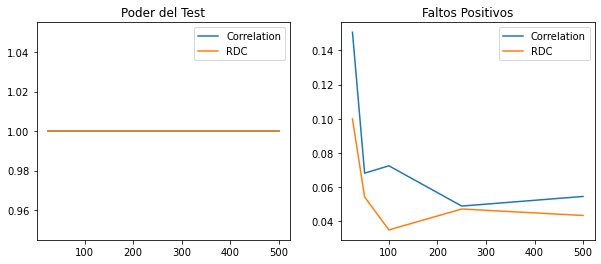

In [37]:
dims = [25, 50, 100, 250, 500]
tprs_corr = []
tprs_rdc = []
fdrs_corr = []
fdrs_rdc = []
for n in dims:
    #n = 25
    alpha = 0.05
    data = pd.read_csv("dim%s_linear_gaussian.csv"%(n,))
    trues = data["true"][:1000]
    pred_corr = data["corr"][:1000]
    pred_rdc = data["rdc"][:1000]
    for i in range(1000):
        if pred_corr[i] < alpha/2:
            pred_corr[i] = 1
        else:
            pred_corr[i] = 0
        if pred_rdc[i] < alpha/2:
            pred_rdc[i] = 1
        else:
            pred_rdc[i] = 0
    tprs_corr.append(tpr(trues, pred_corr))
    tprs_rdc.append(tpr(trues, pred_rdc))

    fdrs_corr.append(fdr(trues, pred_corr))
    fdrs_rdc.append(fdr(trues, pred_rdc))

f, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title("Poder del Test")
ax[1].set_title("Faltos Positivos")
ax[0].plot(dims, tprs_corr, label='Correlation')
ax[0].plot(dims, tprs_rdc, label='RDC')
ax[1].plot(dims, fdrs_corr, label='Correlation')
ax[1].plot(dims, fdrs_rdc, label='RDC')
ax[0].legend()
ax[1].legend()